In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cargar datos
### Cifar 10

In [3]:
cifar10 = keras.datasets.cifar10
(training_images_c10, training_labels_c10), (test_images_c10, test_labels_c10) = cifar10.load_data()

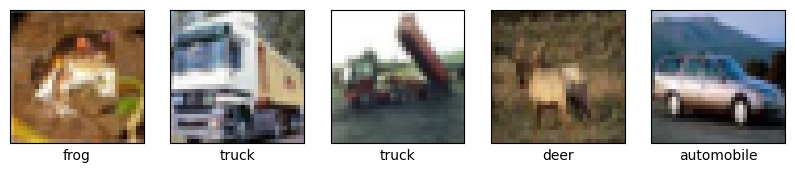

In [7]:
class_names_c10 = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar las primeras 5 imágenes
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images_c10[i])
    plt.xlabel(class_names_c10[training_labels_c10[i][0]])
plt.show()

### Cifar 100

In [4]:
cifar100 = keras.datasets.cifar100
(training_images_c100, training_labels_c100), (test_images_c100, test_labels_c100) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


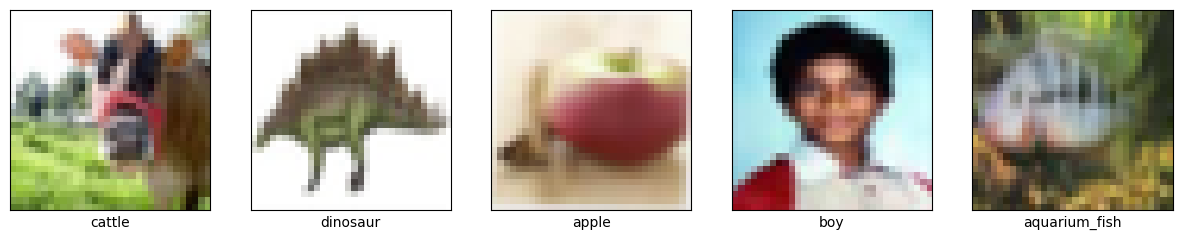

In [8]:
# Nombres de las clases de CIFAR-100
class_names_c100 = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
               'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
               'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
               'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
               'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
               'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
               'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
               'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
               'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
               'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# Mostrar las primeras 5 imágenes
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images_c100[i])
    plt.xlabel(class_names_c100[training_labels_c100[i][0]])
plt.show()

# Normalizar las imágenes
### C10

In [9]:
training_images_c10= training_images_c10 / 255.0
test_images_c10= test_images_c10 / 255.0

### C100

In [10]:
training_images_c100= training_images_c100 / 255.0
test_images_c100= test_images_c100 / 255.0

#Construcción del modelo
### C10

In [14]:
model= keras.Sequential([keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Flatten(),
                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               921728    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

#Compilar modelo
### C10

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Entrenar el modelo

### C10

Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4496 - accuracy: 0.4852
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1385 - accuracy: 0.6002
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0181 - accuracy: 0.6453
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9299 - accuracy: 0.6757
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8542 - accuracy: 0.7038
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7929 - accuracy: 0.7246
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7345 - accuracy: 0.7428
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6793 - accuracy: 0.7621
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6286 - accuracy: 0.7781
Epoch 10/10
1563/1563 [==============================] - 46s 30m

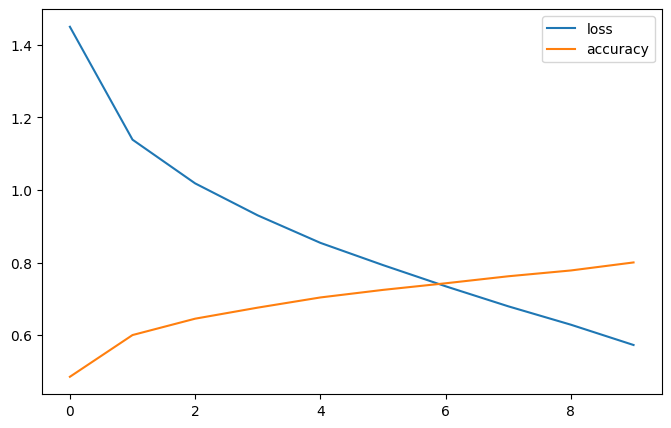

In [16]:
history=model.fit(training_images_c10, training_labels_c10, epochs=10)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Evaluación del modelo
### C10

In [17]:
loss, accuracy = model.evaluate(training_images_c10, training_labels_c10)
print('accuracy training: ',accuracy)
print('loss training: ',loss)

loss, accuracy = model.evaluate(test_images_c10, test_labels_c10)
print('accuracy test: ',accuracy)
print('loss test: ',loss)

1563/1563 [==============================] - 17s 10ms/step - loss: 0.4481 - accuracy: 0.8501
accuracy training:  0.8501399755477905
loss training:  0.44806617498397827
313/313 [==============================] - 3s 8ms/step - loss: 1.1123 - accuracy: 0.6554
accuracy test:  0.6553999781608582
loss test:  1.112346887588501


# Predicción
### C10

Label: [8]
1/1 [==============================] - 0s 173ms/step
Classification: [[3.16456408e-06]
 [1.16471305e-01]
 [4.13989759e-10]
 [1.77314110e-08]
 [1.83403748e-09]
 [2.63368181e-11]
 [1.27090027e-12]
 [4.58157904e-12]
 [8.83494675e-01]
 [3.08883646e-05]]


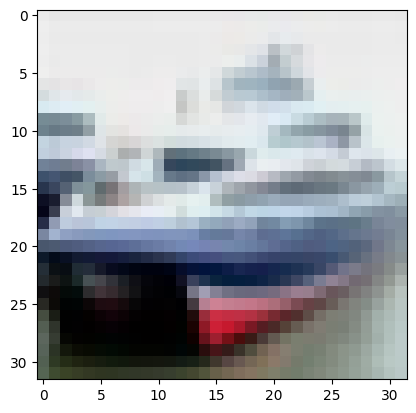

In [18]:
index=1
print(f'Label: {test_labels_c10[index]}')
classification=model.predict(test_images_c10[index:index+1])
print(f'Classification: {classification.reshape(-1,1)}')
plt.imshow(test_images_c10[index])
plt.show()

# Mostrar la matriz de confusión
### C10

313/313 [==============================] - 3s 9ms/step


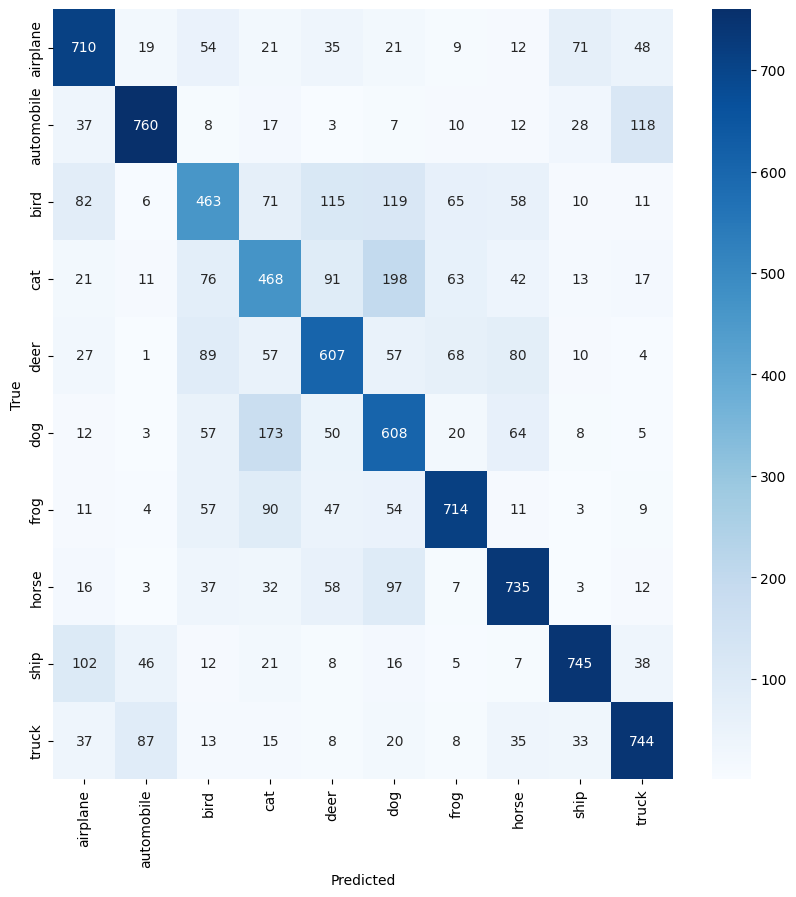

In [19]:

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
predictions = model.predict(test_images_c10)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels_c10, predicted_labels)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_c10, yticklabels=class_names_c10)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Mostrar el reporte de clasificación
### C10

In [22]:
print(classification_report(test_labels_c10, predicted_labels, target_names=class_names_c10))

              precision    recall  f1-score   support

    airplane       0.67      0.71      0.69      1000
  automobile       0.81      0.76      0.78      1000
        bird       0.53      0.46      0.50      1000
         cat       0.48      0.47      0.48      1000
        deer       0.59      0.61      0.60      1000
         dog       0.51      0.61      0.55      1000
        frog       0.74      0.71      0.73      1000
       horse       0.70      0.73      0.71      1000
        ship       0.81      0.74      0.77      1000
       truck       0.74      0.74      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



# Prueba modelo 2 para CIFAR 10

Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.5268 - accuracy: 0.4433
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1534 - accuracy: 0.5913
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9940 - accuracy: 0.6506
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8953 - accuracy: 0.6866
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8242 - accuracy: 0.7109
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7596 - accuracy: 0.7341
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7119 - accuracy: 0.7511
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6700 - accuracy: 0.7650
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6324 - accuracy: 0.7788
Epoch 10/10
1563/1563 [==============================] - 69s 44m

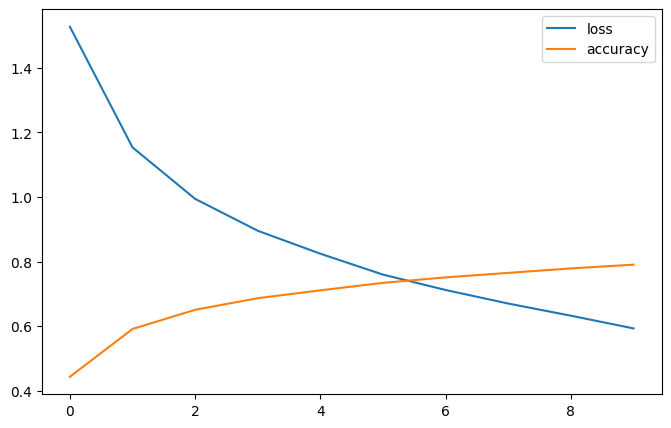

In [23]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(training_images_c10, training_labels_c10, epochs=10)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Métricas

313/313 [==============================] - 7s 22ms/step


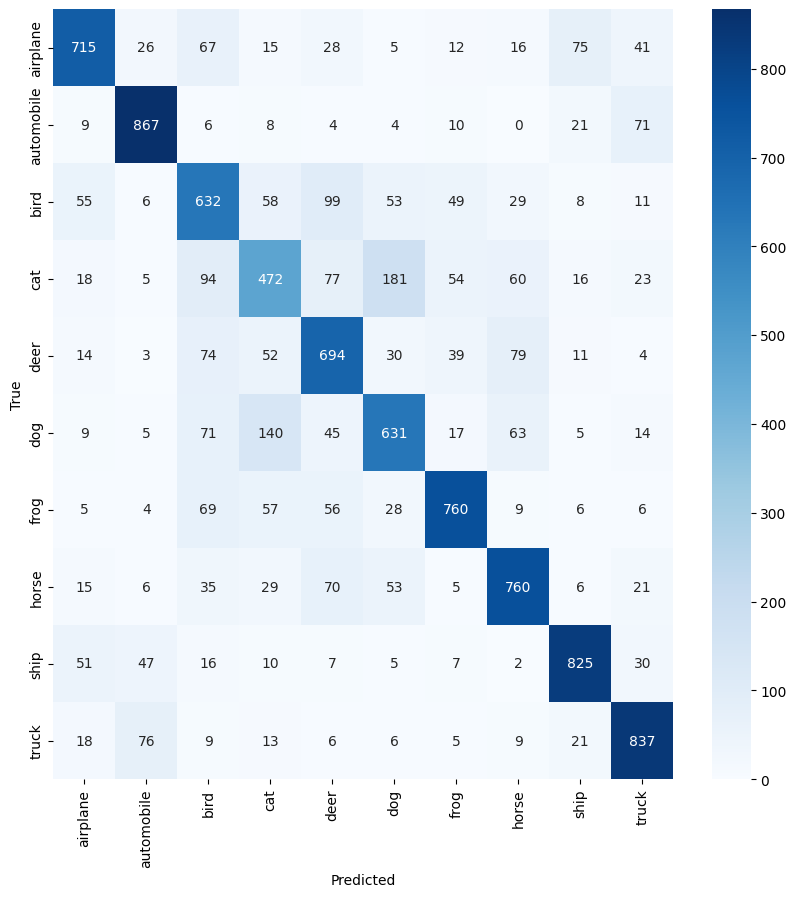

In [24]:

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
predictions = model.predict(test_images_c10)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels_c10, predicted_labels)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_c10, yticklabels=class_names_c10)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
print(classification_report(test_labels_c10, predicted_labels, target_names=class_names_c10))

              precision    recall  f1-score   support

    airplane       0.79      0.71      0.75      1000
  automobile       0.83      0.87      0.85      1000
        bird       0.59      0.63      0.61      1000
         cat       0.55      0.47      0.51      1000
        deer       0.64      0.69      0.67      1000
         dog       0.63      0.63      0.63      1000
        frog       0.79      0.76      0.78      1000
       horse       0.74      0.76      0.75      1000
        ship       0.83      0.82      0.83      1000
       truck       0.79      0.84      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



# En la prueba 2 el modleo tuvo una ligera mejora, se podrían aumentar las épocas para evaluar si mejoran las métricas. Sin ambargo, esto toma un tiempo largo.

# C100

### Modelo

Epoch 1/10
1563/1563 [==============================] - 80s 48ms/step - loss: 3.9348 - accuracy: 0.0978
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 3.2665 - accuracy: 0.2069
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.9788 - accuracy: 0.2639
Epoch 4/10
1563/1563 [==============================] - 70s 44ms/step - loss: 2.7942 - accuracy: 0.2984
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.6483 - accuracy: 0.3278
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 2.5358 - accuracy: 0.3522
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 2.4473 - accuracy: 0.3685
Epoch 8/10
1563/1563 [==============================] - 68s 43ms/step - loss: 2.3622 - accuracy: 0.3846
Epoch 9/10
1563/1563 [==============================] - 75s 48ms/step - loss: 2.2891 - accuracy: 0.4022
Epoch 10/10
1563/1563 [==============================] - 68s 44m

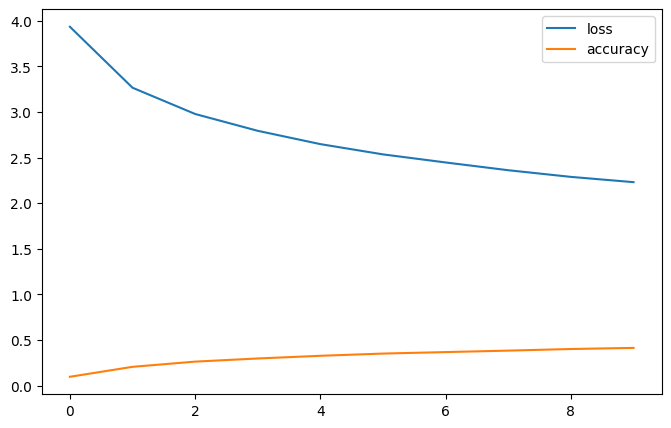

In [27]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(training_images_c100, training_labels_c100, epochs=10)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Métricas

313/313 [==============================] - 9s 29ms/step


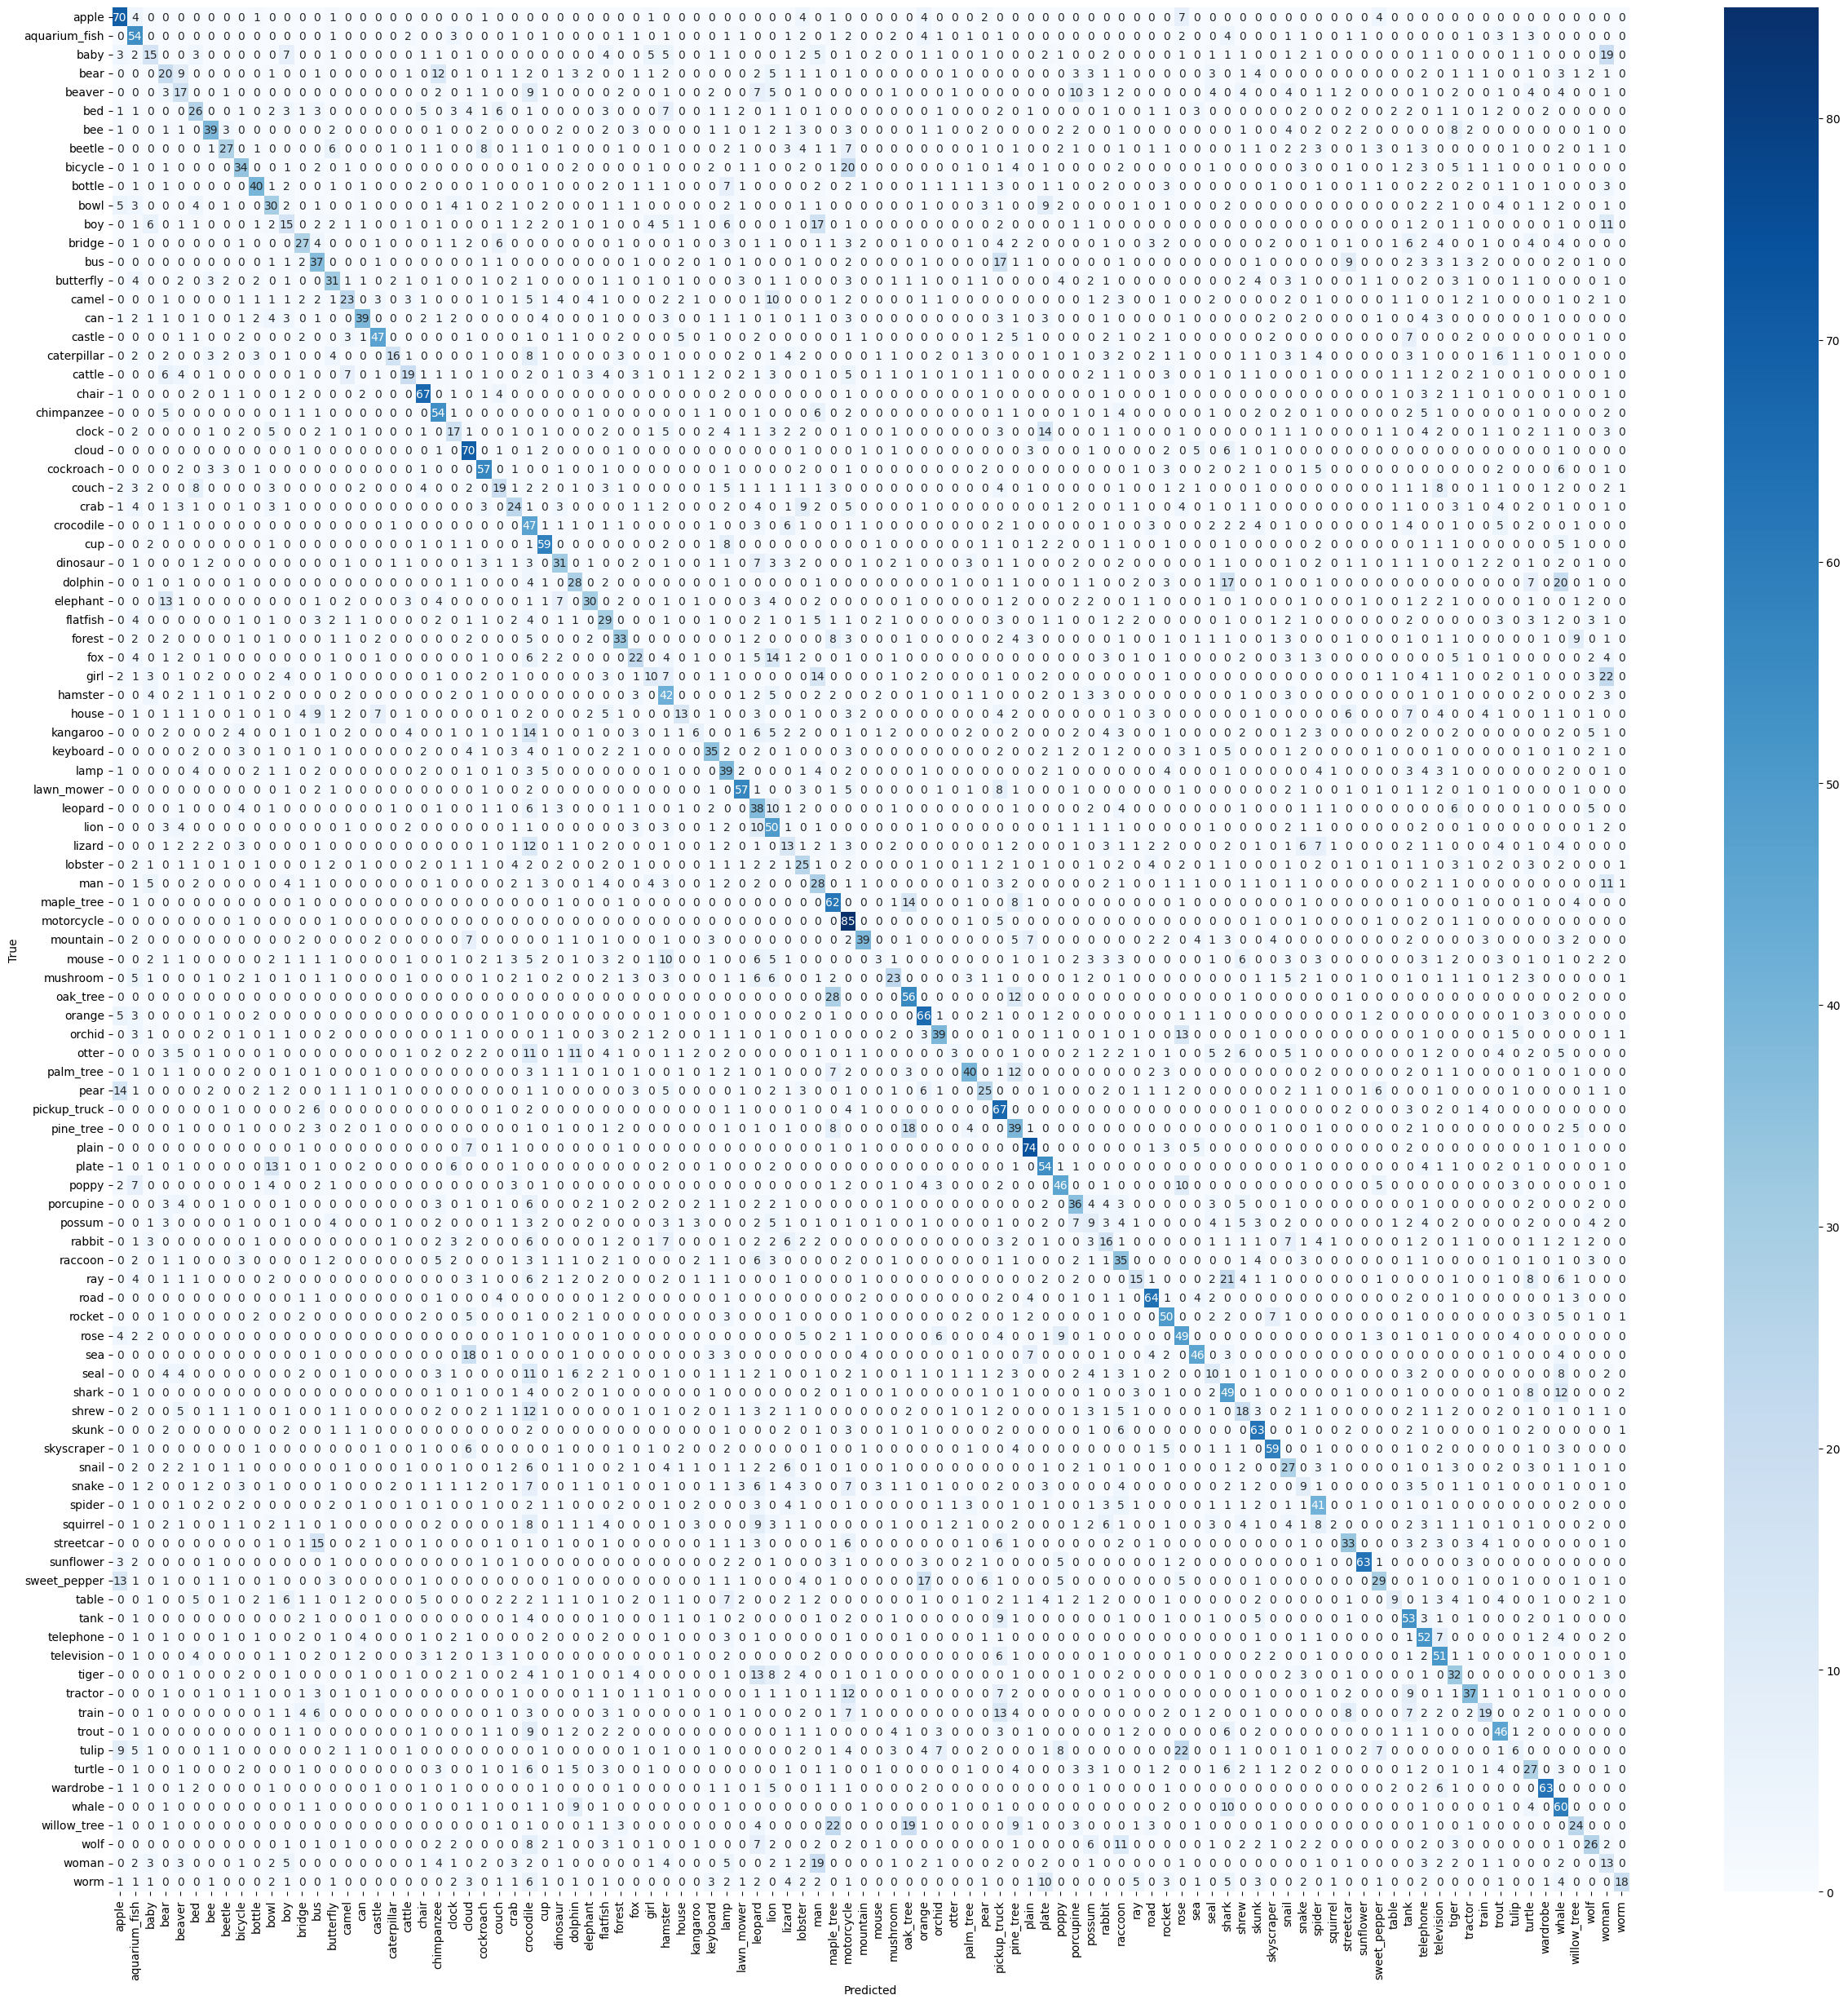

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
predictions = model.predict(test_images_c100)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels_c100, predicted_labels)
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_c100, yticklabels=class_names_c100)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
print(classification_report(test_labels_c100, predicted_labels, target_names=class_names_c100))

               precision    recall  f1-score   support

        apple       0.49      0.70      0.58       100
aquarium_fish       0.34      0.54      0.42       100
         baby       0.25      0.15      0.19       100
         bear       0.21      0.20      0.21       100
       beaver       0.19      0.17      0.18       100
          bed       0.35      0.26      0.30       100
          bee       0.51      0.39      0.44       100
       beetle       0.52      0.27      0.36       100
      bicycle       0.39      0.34      0.36       100
       bottle       0.58      0.40      0.47       100
         bowl       0.30      0.30      0.30       100
          boy       0.19      0.15      0.17       100
       bridge       0.36      0.27      0.31       100
          bus       0.30      0.37      0.33       100
    butterfly       0.35      0.31      0.33       100
        camel       0.38      0.23      0.29       100
          can       0.57      0.39      0.46       100
       ca